In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import seaborn as sns
import os 

In [36]:
path = os.path.join('results', '5x60_non_clifford', 'data')
path_fig = os.path.join('results', '5x60_non_clifford', 'figures')


def custom_idxmin(row):
    min_value = row.min()
    min_count = (row == min_value).sum()
    if min_count > 1 and row["rl-zx"] == min_value:
        return "draw"
    else:
        return row.idxmin()


results_concat = None
results_concat = pd.DataFrame()
resultsg_concat = None
resultsg_concat = pd.DataFrame()
keys = [
    "5x55",
    "5x105",
    "5x155",
    "5x210",
    "10x90",
    "10x180",
    "10x270",
    "10x360",
    "20x160",
    "20x325",
    "20x485",
    "20x650",
    "40x290",
    "40x580",
    "40x875",
    "40x1165",
    "80x525",
    "80x1050",
    "80x1575",
    "80x2100"
]

for key in keys:
    results = {}
    with open(os.path.join(path,"pyzx_stats_stopping_" + key + "_nc.json")) as f:
        pyzx_stats_p = json.load(f)
        f.close()
        results["cflow-zx"] = np.array(pyzx_stats_p["twoqubits"])

    with open(os.path.join(path,"rl_stats_stopping_" + key + "_nc.json")) as f:
        rl_stats_p = json.load(f)
        f.close()
        results["rl-zx"] = np.array(rl_stats_p["twoqubits"])
        results["depth"] = np.array(rl_stats_p["initial_depth"])
        results["episode_len"] = np.array(rl_stats_p["episode_len"])
        results["opt_episode_len"] = np.array(rl_stats_p["opt_episode_len"])
        results["initial_2q"] = np.array(rl_stats_p["initial_2q"])

        qubits, gates = key.split("x")
        results["Qubits"] = np.array([int(qubits)] * 1000)
        results["gates"] = np.array([int(gates)] * 1000)
        action_stats = np.array(rl_stats_p["action_stats"])
        results["(p1)"] = action_stats[:, 0]
        results["(p2)"] = action_stats[:, 1]
        results["(p3)"] = action_stats[:, 1]*0
        results["(p)"] = action_stats[:, 2]
        results["(lc)"] = action_stats[:, 3]
        results["(id)"] = action_stats[:, 4]
        results["(gf)"] = action_stats[:, 5]

    with open(os.path.join(path,"bo_stats_stopping_" + key + "_nc.json")) as f:
        bo_stats_p = json.load(f)
        f.close()
        results["gate-based"] = np.array(bo_stats_p["twoqubits"])

    with open(os.path.join(path,"initial_stats_stopping_" + key + "_nc.json")) as f:
        init_stats_p = json.load(f)
        f.close()
        results["init"] = np.array(init_stats_p["twoqubits"])

    results = pd.DataFrame(results)
    results["win"] = results[["rl-zx", "gate-based", "init", "cflow-zx"]].apply(custom_idxmin, axis=1)
    results["useful"] = results["opt_episode_len"] > 0
    results["Compression"] = results["init"] - results["rl-zx"]
    results["Gate Difference"] = results["cflow-zx"] - results["rl-zx"]
    results_concat = pd.concat([results_concat, results], ignore_index=True)
    condition_1 = (
        (results_concat["gates"] == 55)
        | (results_concat["gates"] == 90)
        | (results_concat["gates"] == 160)
        | (results_concat["gates"] == 290)
        | (results_concat["gates"] == 525)
    )
    condition_2 = (
        (results_concat["gates"] == 105)
        | (results_concat["gates"] == 180)
        | (results_concat["gates"] == 325)
        | (results_concat["gates"] == 580)
        | (results_concat["gates"] == 1050)
    )
    condition_3 = (
        (results_concat["gates"] == 155)
        | (results_concat["gates"] == 270)
        | (results_concat["gates"] == 485)
        | (results_concat["gates"] == 875)
        | (results_concat["gates"] == 1575)
    )
    condition_4 = (
        (results_concat["gates"] == 210)
        | (results_concat["gates"] == 360)
        | (results_concat["gates"] == 650)
        | (results_concat["gates"] == 1165)
        | (results_concat["gates"] == 2100)
    )

# Assign depth values based on conditions
results_concat["Depth"] = np.where(
    condition_1, "1d", np.where(condition_2, "2d", np.where(condition_3, "3d", np.where(condition_4, "4d", None)))
)

for key in keys:
    resultsg = {}
    with open(os.path.join(path,"pyzx_stats_stopping_" + key + "_ncg.json")) as f:
        pyzx_stats_p = json.load(f)
        f.close()
        resultsg["cflow-zx"] = np.array(pyzx_stats_p["gates"])

    with open(os.path.join(path,"rl_stats_stopping_" + key + "_ncg.json")) as f:
        rl_stats_p = json.load(f)
        f.close()
        resultsg["rl-zx"] = np.array(rl_stats_p["gates"])
        resultsg["depth"] = np.array(rl_stats_p["initial_depth"])
        resultsg["episode_len"] = np.array(rl_stats_p["episode_len"])
        resultsg["opt_episode_len"] = np.array(rl_stats_p["opt_episode_len"])

        qubits, gates = key.split("x")
        resultsg["Qubits"] = np.array([int(qubits)] * 1000)
        resultsg["gates"] = np.array([int(gates)] * 1000)
        action_stats = np.array(rl_stats_p["action_stats"])
        resultsg["(p1)"] = action_stats[:, 0]
        resultsg["(p2)"] = action_stats[:, 1]
        resultsg["(p3)"] = action_stats[:, 1]*0
        resultsg["(p)"] = action_stats[:, 2]
        resultsg["(lc)"] = action_stats[:, 3]
        resultsg["(id)"] = action_stats[:, 4]
        resultsg["(gf)"] = action_stats[:, 5]

    with open(os.path.join(path,"bo_stats_stopping_" + key + "_ncg.json")) as f:
        bo_stats_p = json.load(f)
        f.close()
        resultsg["gate-based"] = np.array(bo_stats_p["gates"])

    with open(os.path.join(path,"initial_stats_stopping_" + key + "_ncg.json")) as f:
        init_stats_p = json.load(f)
        f.close()
        resultsg["init"] = np.array(init_stats_p["gates"])

    resultsg = pd.DataFrame(resultsg)
    resultsg["win"] = resultsg[["rl-zx", "gate-based", "init", "cflow-zx"]].apply(custom_idxmin, axis=1)
    resultsg["useful"] = resultsg["opt_episode_len"] > 0
    resultsg["Compression"] = resultsg["init"] - resultsg["rl-zx"]
    resultsg["Gate Difference"] = resultsg["cflow-zx"] - resultsg["rl-zx"]
    resultsg_concat = pd.concat([resultsg_concat, resultsg], ignore_index=True)
    condition_1 = (
        (resultsg_concat["gates"] == 55)
        | (resultsg_concat["gates"] == 90)
        | (resultsg_concat["gates"] == 160)
        | (resultsg_concat["gates"] == 290)
        | (resultsg_concat["gates"] == 525)
    )
    condition_2 = (
        (resultsg_concat["gates"] == 105)
        | (resultsg_concat["gates"] == 180)
        | (resultsg_concat["gates"] == 325)
        | (resultsg_concat["gates"] == 580)
        | (resultsg_concat["gates"] == 1050)
    )
    condition_3 = (
        (resultsg_concat["gates"] == 155)
        | (resultsg_concat["gates"] == 270)
        | (resultsg_concat["gates"] == 485)
        | (resultsg_concat["gates"] == 875)
        | (resultsg_concat["gates"] == 1575)
    )
    condition_4 = (
        (resultsg_concat["gates"] == 210)
        | (resultsg_concat["gates"] == 360)
        | (resultsg_concat["gates"] == 650)
        | (resultsg_concat["gates"] == 1165)
        | (resultsg_concat["gates"] == 2100)
    )

# Assign depth values based on conditions
resultsg_concat["Depth"] = np.where(
    condition_1, "1d", np.where(condition_2, "2d", np.where(condition_3, "3d", np.where(condition_4, "4d", None)))
)
# mean_depth_w.append(np.mean(results[results["win"] == "rl"]["depth"]))
# var_depth_w.append(np.std(results[results["win"] == "rl"]["depth"]))
# mean_depth_l.append(np.mean(results[results["win"] != "rl"]["depth"]))
# var_depth_l.append(np.std(results[results["win"] != "rl"]["depth"]))

In [12]:
resultsg_concat.groupby(["Qubits","Depth"])["depth"].mean()

Qubits  Depth
5       1d       22.421
        2d       41.812
        3d       61.290
        4d       82.772
10      1d       21.127
        2d       41.064
        3d       60.600
        4d       80.541
20      1d       21.316
        2d       41.060
        3d       60.379
        4d       80.409
40      1d       21.254
        2d       40.002
        3d       58.790
        4d       77.581
80      1d       20.879
        2d       38.719
        3d       56.421
        4d       74.193
Name: depth, dtype: float64

In [13]:
statistics = results_concat[["Qubits","Depth", "cflow-zx", "rl-zx", "init"]].groupby(["Qubits", "Depth"]).mean().reset_index()
statistics["percentage"] = (statistics["cflow-zx"]- statistics["rl-zx"])/((statistics["init"]- statistics["cflow-zx"]))
statistics


statisticsg = resultsg_concat[["Qubits","Depth", "cflow-zx", "rl-zx", "init"]].groupby(["Qubits", "Depth"]).mean().reset_index()
statisticsg["percentage"] = (statisticsg["cflow-zx"]- statisticsg["rl-zx"])/((statisticsg["init"]- statisticsg["cflow-zx"]))
statisticsg

,Qubits,Depth,cflow-zx,rl-zx,init,percentage
0,5,1d,36.647,35.223,38.087,0.988889
1,5,2d,62.872,61.270,66.897,0.398012
2,5,3d,88.210,86.807,94.340,0.228874
3,5,4d,115.600,115.400,124.811,0.021713
4,10,1d,64.677,63.011,65.826,1.449956
5,10,2d,117.271,113.633,120.663,1.072524
6,10,3d,169.081,164.672,174.726,0.781045
7,10,4d,221.911,217.184,230.582,0.545151
8,20,1d,119.155,117.298,120.415,1.473810
9,20,2d,217.675,212.971,221.851,1.126437


<Figure size 1000x600 with 0 Axes>

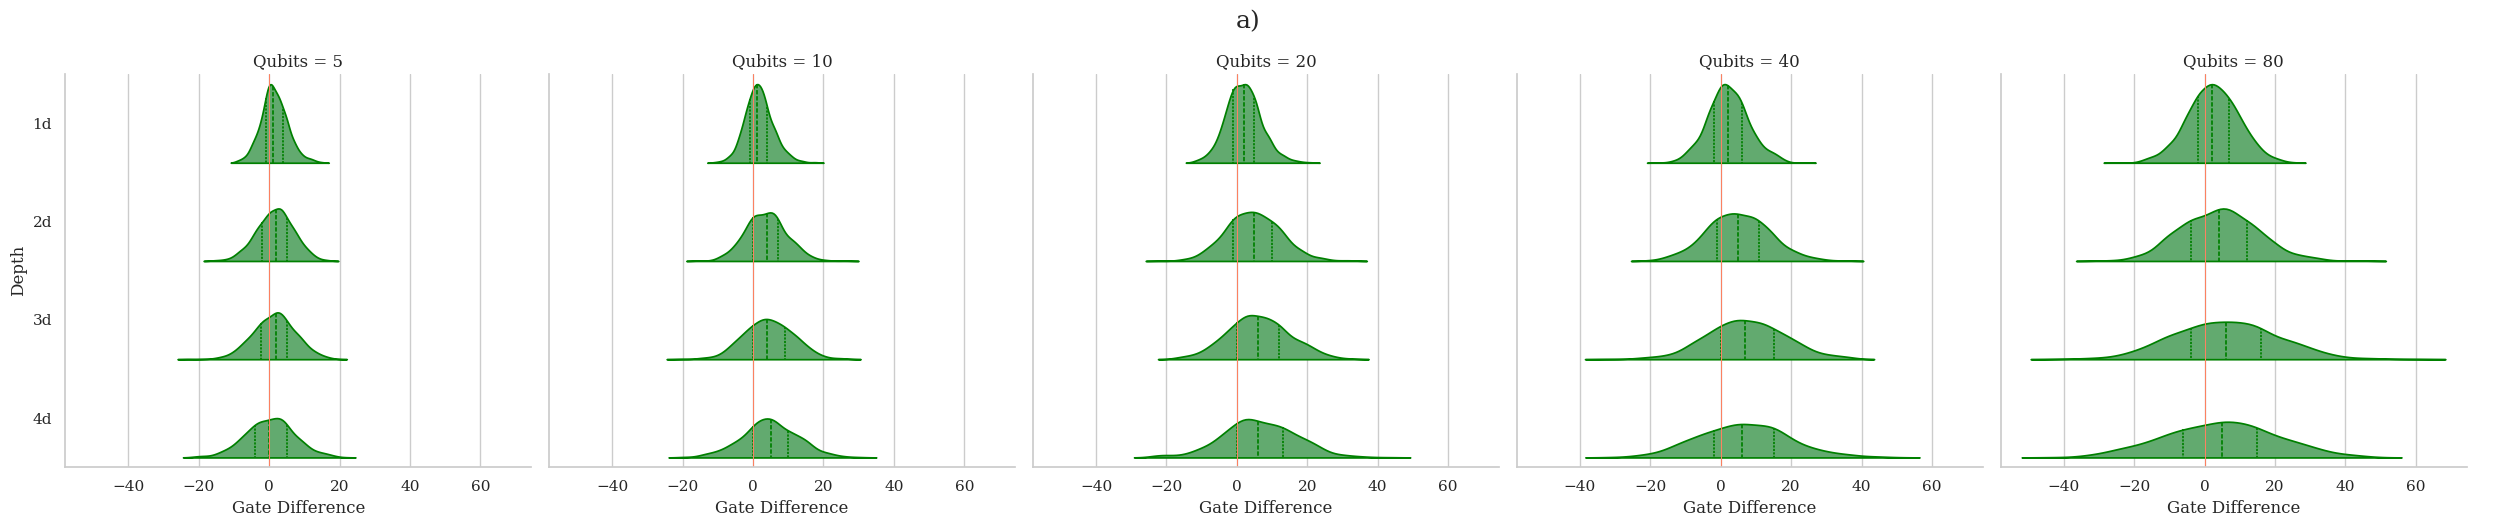

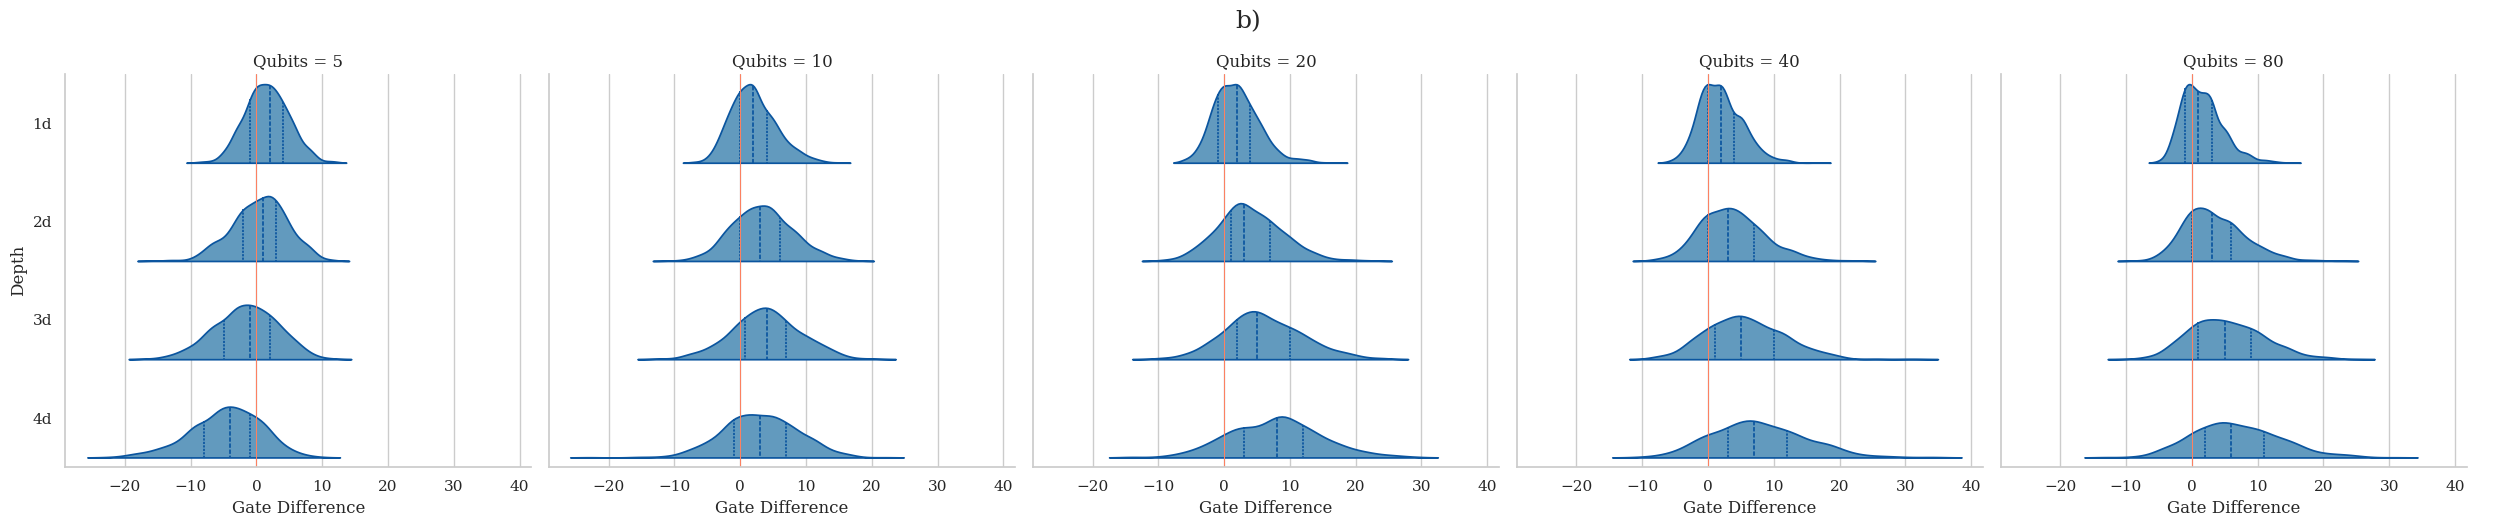

In [37]:
sns.set(style="whitegrid")

# Create the scatter plot
plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed# Create the catplot
g = sns.catplot(data=resultsg_concat, x="Gate Difference", y="Depth", col="Qubits", kind="violin", color=(0.3388235294117647, 0.7117262591311034, 0.40584390618992694), inner="quart", split=True, orient='y', linecolor="green")

for ax in g.axes.flat:
    ax.axvline(0, color=(0.9865897731641676, 0.5067281814686659, 0.38123798539023457), linewidth=0.75)
# Adjust legend

g.fig.suptitle('a)', y=1.05, fontsize=18)
plt.savefig(os.path.join(path_fig,"vscflowgates.png"), format="png", bbox_inches="tight")


g = sns.catplot(data=results_concat, x="Gate Difference", y="Depth", col="Qubits", kind="violin", color=(0.32628988850442137, 0.6186236063052672, 0.802798923490965), inner="quart", split=True, orient='y', linecolor=(0.044059976931949255, 0.3338869665513264, 0.6244521337946944))
for ax in g.axes.flat:
    ax.axvline(0, color=(0.9865897731641676, 0.5067281814686659, 0.38123798539023457), linewidth=0.75)
g.fig.suptitle('b)', y=1.05, fontsize=18)
plt.savefig(os.path.join(path_fig, "vscflow2qubits.png"), format="png", bbox_inches="tight")

plt.show()


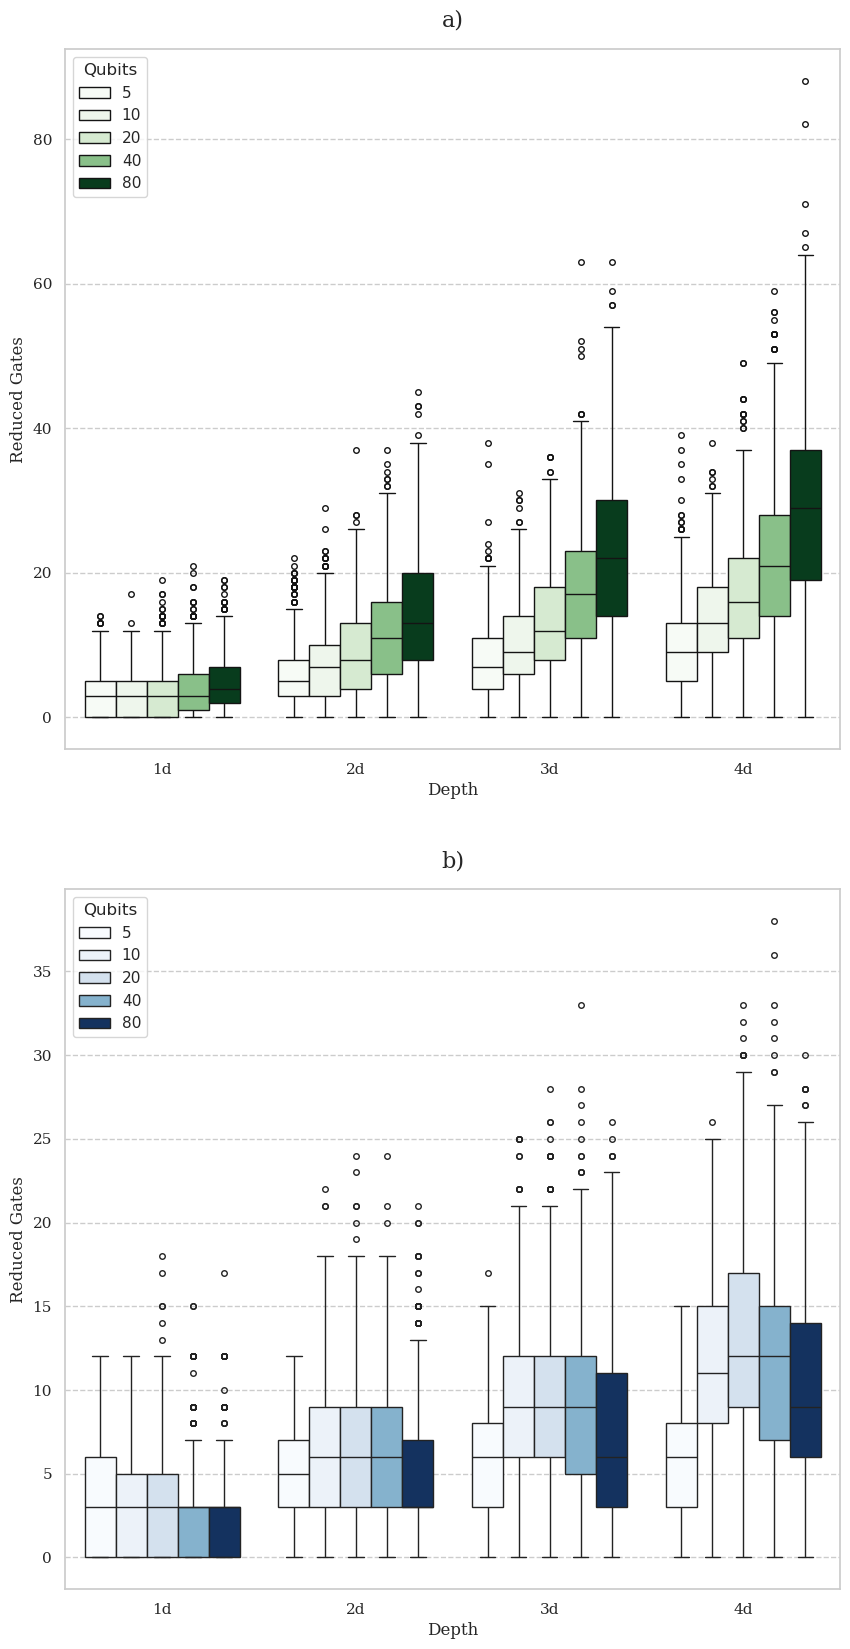

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["grid.linestyle"] = "dashed"
plt.rcParams["font.family"] = "serif"
fig, axis = plt.subplots(2, 1, figsize=(10, 20))
# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Create the swarm plot
flierprops = dict(markersize=4,
              linestyle='none')

sns.boxplot(data=resultsg_concat, x="Depth", y="Compression", hue="Qubits", palette="Greens", ax=axis[0], flierprops=flierprops)
sns.boxplot(data=results_concat, x="Depth", y="Compression", hue="Qubits", palette="Blues", ax=axis[1], flierprops=flierprops)


#sns.violinplot(data=resultsg_concat, x="qubits", y="opt_episode_len", hue="mean_depth", palette="viridis", ax=axis[1],cut=0)


# Add labels and title
axis[0].set_xlabel("Depth")
axis[0].set_ylabel("Reduced Gates")
axis[0].set_title('a)',fontsize=16, y=1.02)
axis[1].set_xlabel("Depth")
axis[1].set_ylabel("Reduced Gates")
axis[1].set_title('b)',fontsize=16,  y=1.02)

# Show the plot

plt.savefig(os.path.join(path_fig,"CompressionGates2qubits.png"), format="png", bbox_inches="tight")


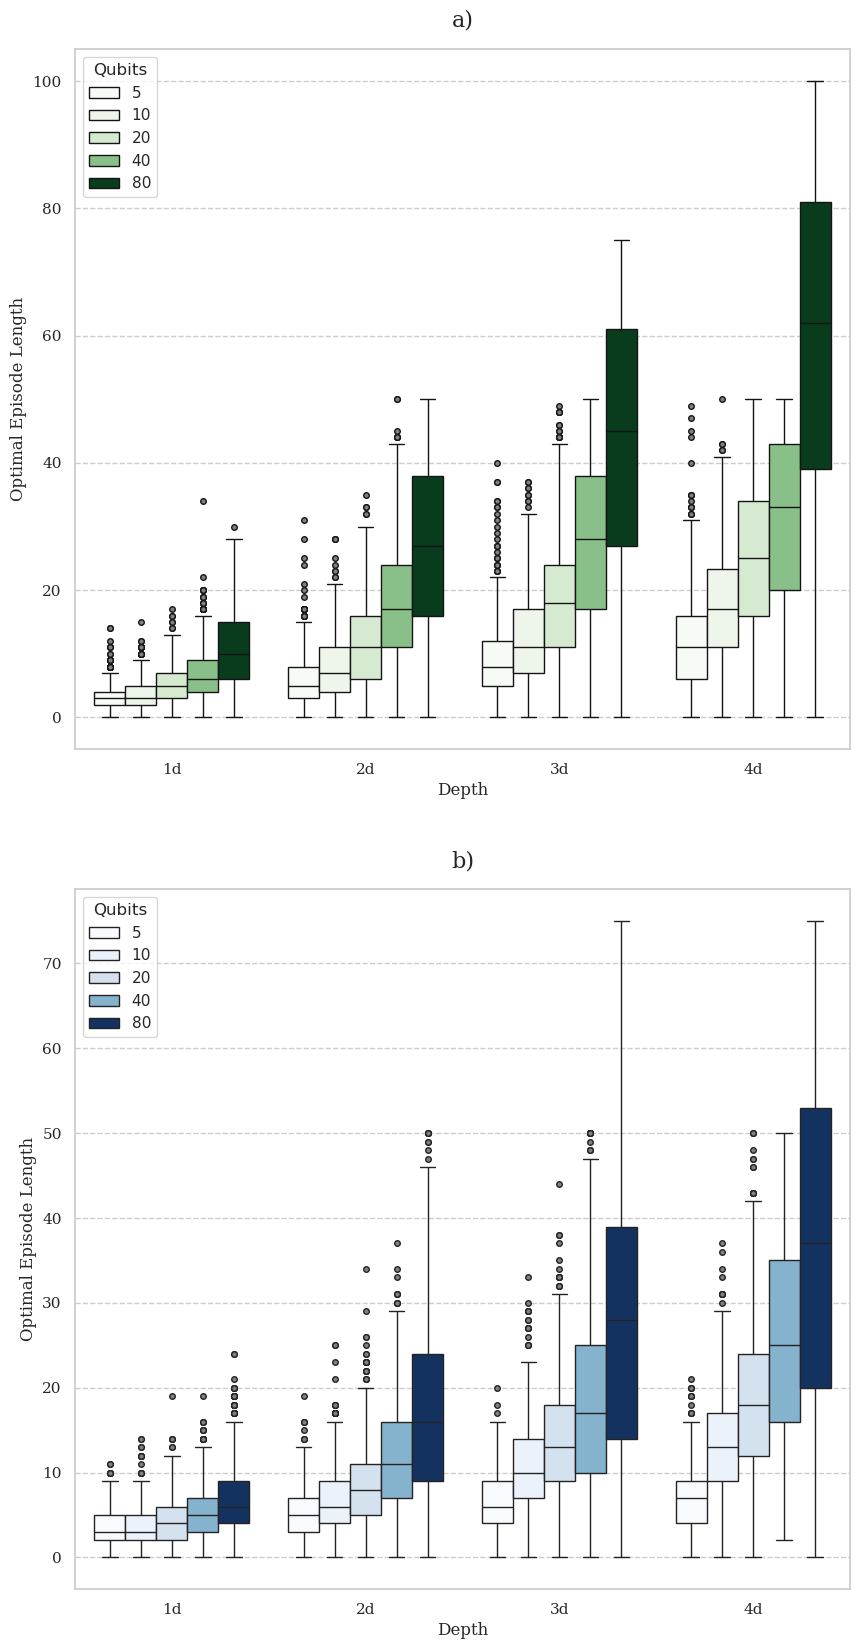

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["grid.linestyle"] = "dashed"
plt.rcParams["font.family"] = "serif"
fig, axis = plt.subplots(2, 1, figsize=(10, 20))
# Set Seaborn style (optional)
sns.set(style="whitegrid")

# Create the swarm plot
flierprops = dict(markerfacecolor='0.5', markersize=4,
              linestyle='none')

sns.boxplot(data=resultsg_concat, x="Depth", y="opt_episode_len", hue="Qubits", palette="Greens", ax=axis[0], flierprops=flierprops)
sns.boxplot(data=results_concat, x="Depth", y="opt_episode_len", hue="Qubits", palette="Blues", ax=axis[1], flierprops=flierprops)


# Add labels and title
axis[0].set_xlabel("Depth")
axis[0].set_ylabel("Optimal Episode Length")
axis[0].set_title('a)',fontsize=16, y=1.02)
axis[1].set_xlabel("Depth")
axis[1].set_ylabel("Optimal Episode Length")
axis[1].set_title('b)',fontsize=16, y=1.02)

# Show the plot
plt.savefig(os.path.join(path_fig,"EpisodeLenGates2qubits.png"), format="png", bbox_inches="tight")

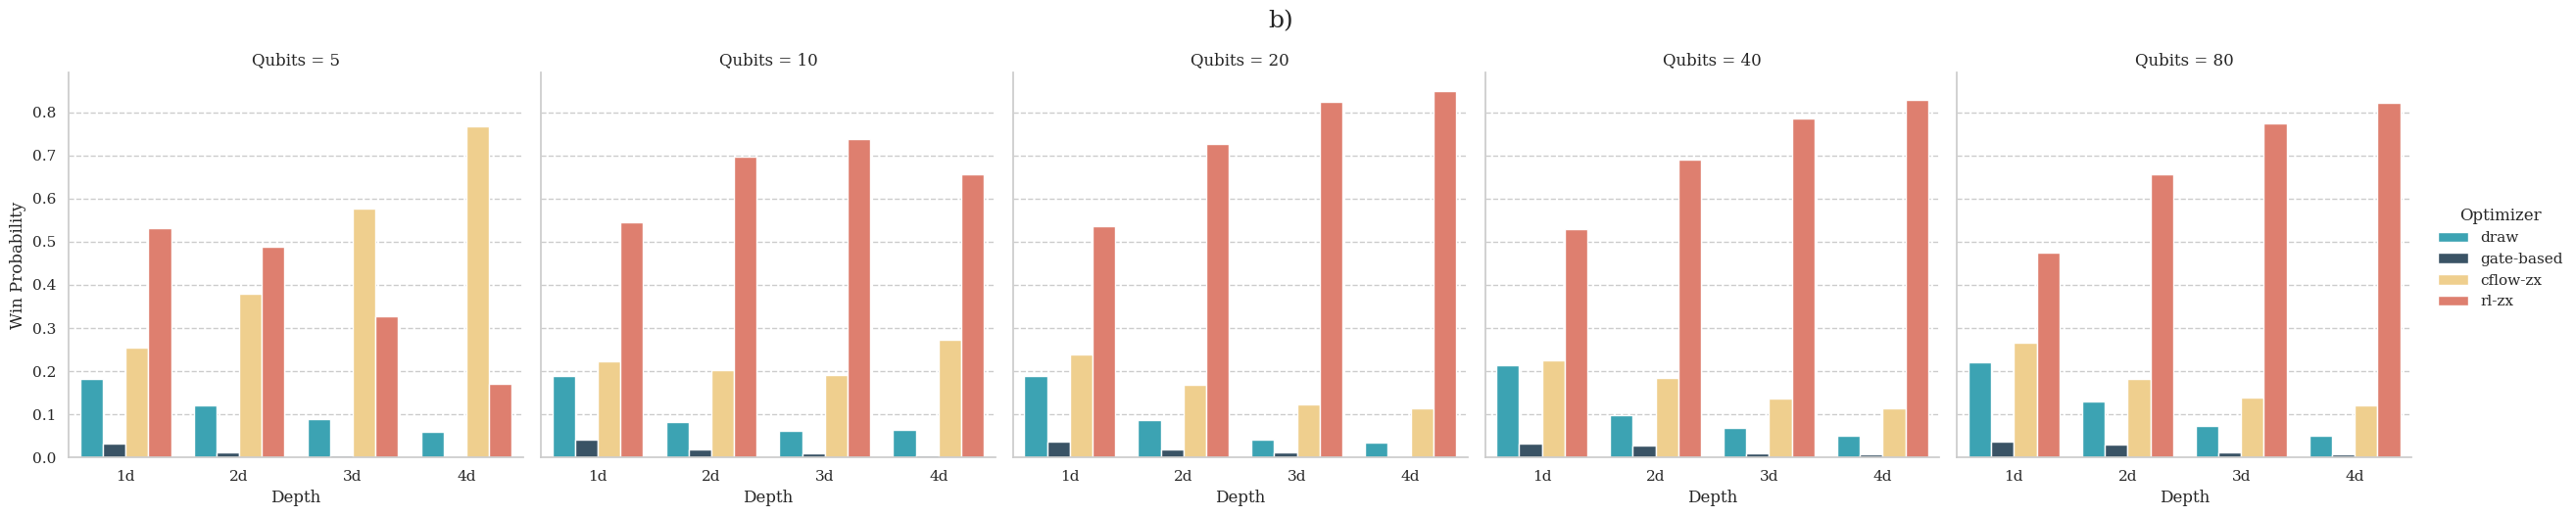

In [232]:
plt.rcParams["grid.linestyle"] = "dashed"
plt.rcParams["font.family"] = "serif"

wins = results_concat.groupby(["Qubits", "Depth", "win"]).size() / 1000
wins = wins.reset_index()
wins.rename(
    columns={0: "Win Probability"},
    inplace=True,
)

winsg = resultsg_concat.groupby(["Qubits", "Depth", "win"]).size() / 1000
winsg = winsg.reset_index()
winsg.rename(
    columns={0: "Win Probability"},
    inplace=True,
)

wins["Optimizer"] = pd.Categorical(wins["win"], categories=["draw", "gate-based", "cflow-zx", "rl-zx"], ordered=True)
winsg["Optimizer"] = pd.Categorical(winsg["win"], categories=["draw", "gate-based", "cflow-zx", "rl-zx"], ordered=True)

palette = {'draw': "#28B2C7", 'rl-zx':  "#f0725c", 'cflow-zx': "#FFD57E", 'gate-based': "#33546C"}

plt.rcParams["font.family"] = "serif"
g = sns.catplot(data=wins, x="Depth", y="Win Probability", hue="Optimizer", col="Qubits", kind="bar", palette=palette)
g.fig.suptitle('b)', y=1.05, fontsize=18)
plt.savefig(os.path.join(path_fig,"Wins2qubits.png"), format="png", bbox_inches="tight")

# Change the y-tick labels
# axis[0].set_yticks(locs)
# axis[0].set_yticklabels(np.round(locs * 5, 3))

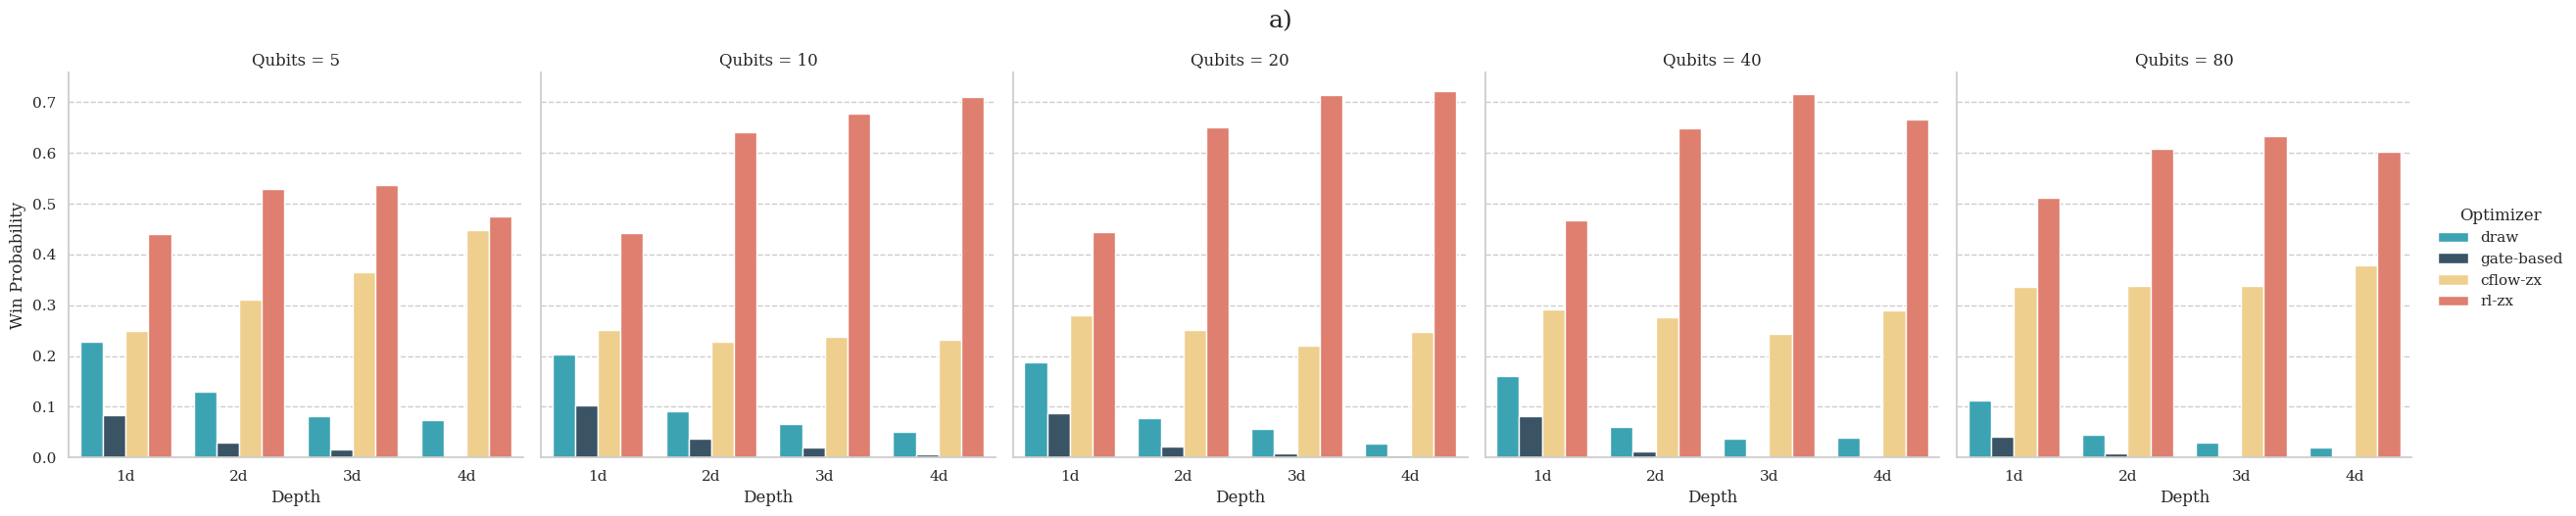

In [233]:
g = sns.catplot(data=winsg, x="Depth", y="Win Probability", hue="Optimizer", col="Qubits", kind="bar",  palette=palette)
plt.rcParams["font.family"] = "serif"
g.fig.suptitle('a)', y=1.05, fontsize=18)

plt.savefig(os.path.join(path_fig,"WinsGates.png"), format="png", bbox_inches="tight")

In [234]:
actions_df = (results_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].sum() / 1000).reset_index()
"""
df_melted = actions_df.melt(id_vars="gates", var_name="action", value_name="sum")

# Create the plot on the specified axis
sns.barplot(data=df_melted, x="gates", y="sum", hue="action", ax=axis[2],multiple="stack" )
"""
actionsg_df = (resultsg_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].sum() / 1000).reset_index()


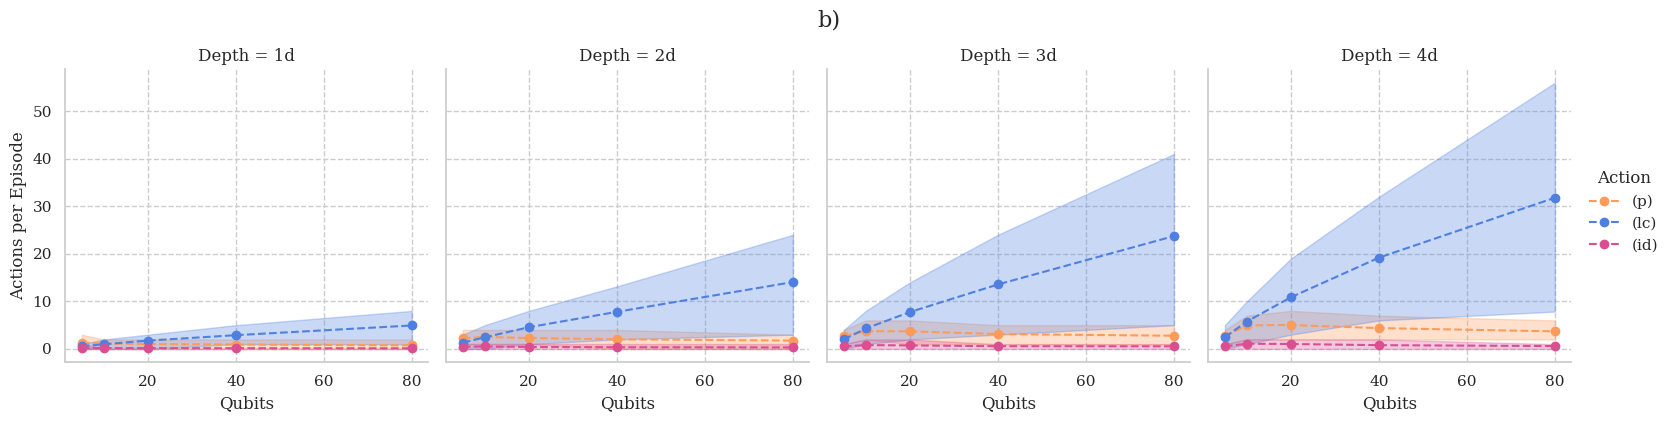

In [235]:
df_melted = actions_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='Probability')
percentile_1_df = (results_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].quantile(0.15)).reset_index()
percentile_3_df = (results_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].quantile(0.85)).reset_index()

# Rename the columns to indicate that they represent percentiles
percentile_1_df.columns = ["Qubits", "Depth", "(p) 1st percentile", "(lc) 1st percentile", "(id) 1st percentile"]
percentile_3_df.columns = ["Qubits", "Depth", "(p) 3rd percentile", "(lc) 3rd percentile", "(id) 3rd percentile"]

# Melt the DataFrames to have actions and percentiles in separate rows instead of columns
percentile_1_melted = percentile_1_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='1st Percentile')
percentile_3_melted = percentile_3_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='3rd Percentile')

# Remove the ' 1st percentile' and ' 3rd percentile' from the Action names
percentile_1_melted['Action'] = percentile_1_melted['Action'].str.replace(' 1st percentile', '')
percentile_3_melted['Action'] = percentile_3_melted['Action'].str.replace(' 3rd percentile', '')

# Merge the melted DataFrames
df_merged = pd.merge(df_melted, percentile_1_melted,  how='left', left_on=['Depth','Qubits', 'Action'], right_on = ['Depth','Qubits', 'Action'])
df_merged = pd.merge(df_merged, percentile_3_melted,  how='left', left_on=['Depth','Qubits', 'Action'], right_on = ['Depth','Qubits', 'Action'])

g = sns.FacetGrid(df_merged, col='Depth', hue='Action', col_wrap=4, height=4, palette=sns.color_palette(["#fd9b5a","#4f80e1","#d94f92","#8c4de5","#ff6f69","#00b2f0","#00f0e0","#00f08a","#7cf000"]))

# Define a function to plot with error bars
def lineplot_with_error_bars(x, y, lower, upper, color, label, **kwargs):
    ax = plt.gca()
    line, = ax.plot(x, y, linestyle='--', marker='o', color=color, label=label)
    ax.fill_between(x, lower, upper, color=color, alpha=0.3)

# Map the function to each facet
plt.rcParams["font.family"] = "serif"
g.map(lineplot_with_error_bars, 'Qubits', 'Probability', '1st Percentile', '3rd Percentile')
g.add_legend()
g.set_ylabels("Actions per Episode")
g.fig.suptitle('b)', y=1.05, fontsize=16)
plt.savefig(os.path.join(path_fig,"action_type2q.png"), format="png", bbox_inches="tight")


In [236]:
actions_df

,Qubits,Depth,(p),(lc),(id)
0,5,1d,1.341,0.588,0.267
1,5,2d,2.226,1.317,0.470
2,5,3d,2.672,1.992,0.529
3,5,4d,2.690,2.483,0.549
4,10,1d,1.119,0.979,0.188
5,10,2d,2.531,2.449,0.522
6,10,3d,3.735,4.307,0.808
7,10,4d,4.950,5.764,1.100
8,20,1d,1.032,1.753,0.169
9,20,2d,2.289,4.563,0.407


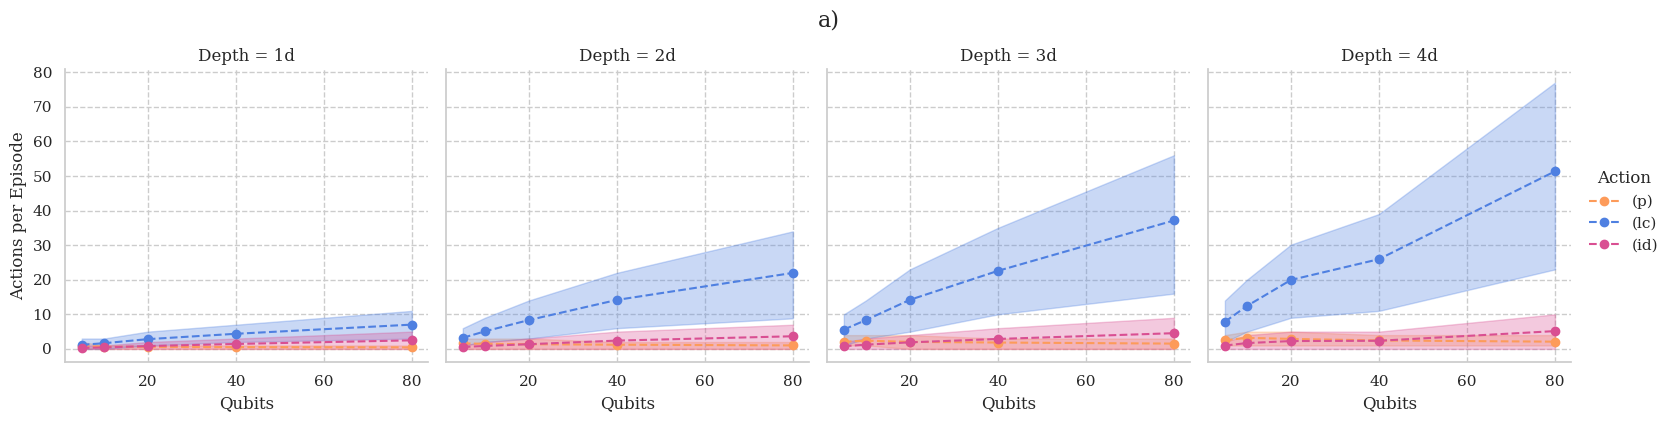

In [13]:
df_melted = actionsg_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='Probability')
percentile_1_df = (resultsg_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].quantile(0.15)).reset_index()
percentile_3_df = (resultsg_concat.groupby(["Qubits", "Depth"])[["(p)", "(lc)", "(id)"]].quantile(0.85)).reset_index()

# Rename the columns to indicate that they represent percentiles
percentile_1_df.columns = ["Qubits", "Depth", "(p) 1st percentile", "(lc) 1st percentile", "(id) 1st percentile"]
percentile_3_df.columns = ["Qubits", "Depth", "(p) 3rd percentile", "(lc) 3rd percentile", "(id) 3rd percentile"]

# Melt the DataFrames to have actions and percentiles in separate rows instead of columns
percentile_1_melted = percentile_1_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='1st Percentile')
percentile_3_melted = percentile_3_df.melt(id_vars=['Depth', 'Qubits'], var_name='Action', value_name='3rd Percentile')

# Remove the ' 1st percentile' and ' 3rd percentile' from the Action names
percentile_1_melted['Action'] = percentile_1_melted['Action'].str.replace(' 1st percentile', '')
percentile_3_melted['Action'] = percentile_3_melted['Action'].str.replace(' 3rd percentile', '')

# Merge the melted DataFrames
df_merged = pd.merge(df_melted, percentile_1_melted,  how='left', left_on=['Depth','Qubits', 'Action'], right_on = ['Depth','Qubits', 'Action'])
df_merged = pd.merge(df_merged, percentile_3_melted,  how='left', left_on=['Depth','Qubits', 'Action'], right_on = ['Depth','Qubits', 'Action'])

g = sns.FacetGrid(df_merged, col='Depth', hue='Action', col_wrap=4, height=4, palette=sns.color_palette(["#fd9b5a","#4f80e1","#d94f92","#8c4de5","#ff6f69","#00b2f0","#00f0e0","#00f08a","#7cf000"]))

# Define a function to plot with error bars
def lineplot_with_error_bars(x, y, lower, upper, color, label, **kwargs):
    ax = plt.gca()
    line, = ax.plot(x, y, linestyle='--', marker='o', color=color, label=label)
    ax.fill_between(x, lower, upper, color=color, alpha=0.3)

# Map the function to each facet
plt.rcParams["font.family"] = "serif"
g.map(lineplot_with_error_bars, 'Qubits', 'Probability', '1st Percentile', '3rd Percentile')
g.add_legend()
g.set_ylabels("Actions per Episode")
g.fig.suptitle('a)', y=1.05, fontsize=16)
plt.savefig(os.path.join(path_fig,"action_typegates.png"), format="png", bbox_inches="tight")


In [14]:
df_merged

,Depth,Qubits,Action,Probability,1st Percentile,3rd Percentile
0,1d,5,(p),0.718,0.0,2.00
1,2d,5,(p),1.278,0.0,2.00
2,3d,5,(p),1.637,0.0,3.00
3,4d,5,(p),1.939,1.0,3.00
4,1d,10,(p),0.607,0.0,1.00
5,2d,10,(p),1.286,0.0,2.00
6,3d,10,(p),1.960,0.0,3.00
7,4d,10,(p),2.622,1.0,4.00
8,1d,20,(p),0.554,0.0,1.00
9,2d,20,(p),1.181,0.0,2.00


In [17]:
results_concat_time = pd.DataFrame()
with open(os.path.join(path,"time_depth_5.json")) as f:
    time_stats = json.load(f)
    results ={}
    results["cflow"] = time_stats["full_time"]
    results["cflow_var"] = time_stats["full_time"]
    results["rl-zx"] = time_stats["rl_time"]
    results["rl-zx_var"] = time_stats["rl_var"]
    results["Qubits"] = [5]*4
    results["Depth"] = ["1d","2d","3d","4d"]
    results = pd.DataFrame(results)
    results_concat_time = pd.concat([results_concat_time, results], ignore_index=True)
    f.close()
with open(os.path.join(path,"time_depth_10.json")) as f:
    time_stats = json.load(f)
    results ={}
    results["cflow"] = time_stats["full_time"]
    results["cflow_var"] = time_stats["full_time"]
    results["rl-zx"] = time_stats["rl_time"]
    results["rl-zx_var"] = time_stats["rl_var"]
    results["Qubits"] = [10]*4
    results["Depth"] = ["1d","2d","3d","4d"]
    results = pd.DataFrame(results)
    results_concat_time = pd.concat([results_concat_time, results], ignore_index=True)
    f.close()
with open(os.path.join(path,"time_depth_20.json")) as f:
    time_stats = json.load(f)
    results ={}
    results["cflow"] = time_stats["full_time"]
    results["cflow_var"] = time_stats["full_time"]
    results["rl-zx"] = time_stats["rl_time"]
    results["rl-zx_var"] = time_stats["rl_var"]
    results["Qubits"] = [20]*4
    results["Depth"] = ["1d","2d","3d","4d"]
    results = pd.DataFrame(results)
    results_concat_time = pd.concat([results_concat_time, results], ignore_index=True)
    f.close()
with open(os.path.join(path,"time_depth_40.json")) as f:
    time_stats = json.load(f)
    results ={}
    results["cflow"] = time_stats["full_time"]
    results["cflow_var"] = time_stats["full_time"]
    results["rl-zx"] = time_stats["rl_time"]
    results["rl-zx_var"] = time_stats["rl_var"]
    results["Qubits"] = [40]*4
    results["Depth"] = ["1d","2d","3d","4d"]
    results = pd.DataFrame(results)
    results_concat_time = pd.concat([results_concat_time, results], ignore_index=True)
    f.close()
    
with open(os.path.join(path,"time_depth_80.json")) as f:
    time_stats = json.load(f)
    results ={}
    results["cflow"] = time_stats["full_time"]
    results["cflow_var"] = time_stats["full_time"]
    results["rl-zx"] = time_stats["rl_time"]
    results["rl-zx_var"] = time_stats["rl_var"]
    results["Qubits"] = [80]*4
    results["Depth"] = ["1d","2d","3d","4d"]
    results = pd.DataFrame(results)
    results_concat_time = pd.concat([results_concat_time, results], ignore_index=True)
    f.close()
    

In [27]:
results_concat_time

,cflow,cflow_var,rl-zx,rl-zx_var,Qubits,Depth
0,0.012941,0.012941,0.088788,0.074450,5,1d
1,0.029854,0.029854,0.199547,0.073574,5,2d
2,0.051160,0.051160,0.384484,0.130117,5,3d
3,0.074612,0.074612,0.577507,0.196920,5,4d
4,0.020757,0.020757,0.136687,0.082817,10,1d
5,0.057843,0.057843,0.413738,0.146452,10,2d
6,0.102770,0.102770,0.897570,0.334872,10,3d
7,0.158707,0.158707,1.530715,0.453336,10,4d
8,0.039966,0.039966,0.262801,0.120658,20,1d
9,0.117631,0.117631,0.972658,0.337242,20,2d


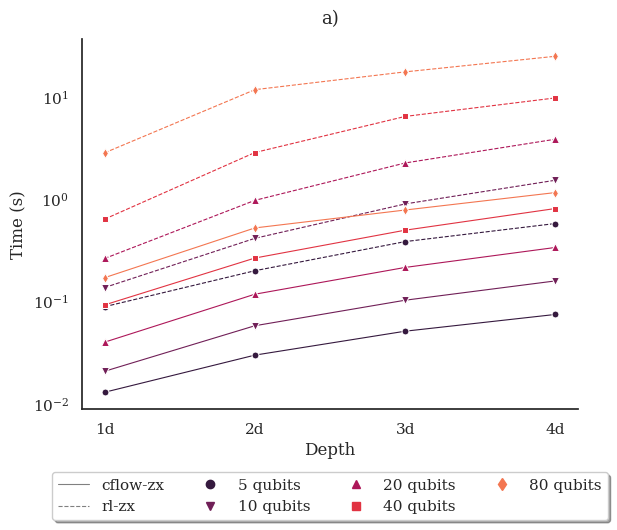

In [35]:
sns.set_style("white")
plt.rcParams["font.family"] = "serif"
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

ax = sns.lineplot(data=results_concat_time, x='Depth', y='rl-zx', hue='Qubits', markers=True, palette = sns.color_palette("rocket")[0:-1])
sns.lineplot(data=results_concat_time, x='Depth', y='cflow', hue='Qubits', markers=True, ax=ax, palette = sns.color_palette("rocket")[0:-1])
ax.set_yscale('log')
# Set linestyle and marker for each line
# ... (your code for setting linestyle and markers)

lines = ax.lines

# Set linestyle, marker, and markersize for each line
for i, line in enumerate(lines):
    line.set_linestyle("--" if i < 5 else "-")
    line.set_linewidth(0.8)
    line.set_marker(['o', 'v', '^', 's', 'd'][i % 5])
    marker = ['o', 'v', '^', 's', 'd'][i % 5]
    line.set_markersize(6 if marker == 'v' or marker== '^' else 5)

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='grey', lw=0.8, linestyle='-', label='cflow-zx'),
    Line2D([0], [0], color='grey', lw=0.8, linestyle='--', label='rl-zx')
]

# Add qubits with markers to legend handles
marker_styles = ['o', 'v', '^', 's', 'd']
colors = sns.color_palette("rocket")[0:-1]  # replace with actual colors
qubit_values = sorted(results_concat_time['Qubits'].unique())
for qubit, marker, color in zip(qubit_values, marker_styles, colors):
    custom_lines.append(Line2D([0], [0], color=color, lw=2, marker=marker, linestyle='None', label=f'{qubit} qubits'))

# Set the legend with the custom handles
plt.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=4)
ax.set_ylabel("Time (s)")
ax.set_title('a)', fontsize=13, y=1.02)
sns.despine()
sns.set_style("white")
plt.savefig(os.path.join(path_fig,"Timedepth.png"), format="png", bbox_inches="tight")




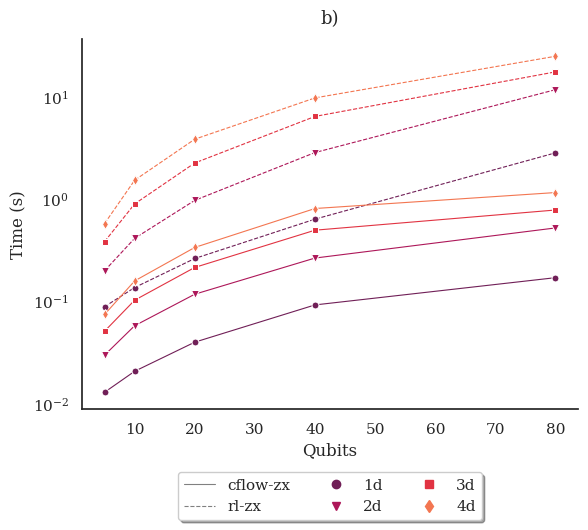

In [66]:

sns.set_style("white")
plt.rcParams["font.family"] = "serif"
ax = sns.lineplot(data=results_concat_time, x='Qubits', y='rl-zx', hue='Depth', markers=True, palette = sns.color_palette("rocket")[1:-1])
sns.lineplot(data=results_concat_time, x='Qubits', y='cflow', hue='Depth', markers=True, ax=ax, palette = sns.color_palette("rocket")[1:-1])
ax.set_yscale('log')
# Set linestyle and marker for each line
# ... (your code for setting linestyle and markers)

lines = ax.lines

# Set linestyle, marker, and markersize for each line
for i, line in enumerate(lines):
    line.set_linestyle("--" if i < 4 else "-")
    line.set_linewidth(0.8)
    line.set_marker(['o', 'v', 's', 'd'][i % 4])
    line.set_markersize(5 if i % 4 != 1 else 6)

from matplotlib.lines import Line2D

custom_lines = [
    Line2D([0], [0], color='grey', lw=0.8, linestyle='-', label='cflow-zx'),
    Line2D([0], [0], color='grey', lw=0.8, linestyle='--', label='rl-zx')
]

# Add qubits with markers to legend handles
marker_styles = ['o', 'v', 's', 'd']
colors = sns.color_palette("rocket")[1:-1]  # replace with actual colors
qubit_values = sorted(results_concat_time['Depth'].unique())
for qubit, marker, color in zip(qubit_values, marker_styles, colors):
    custom_lines.append(Line2D([0], [0], color=color, lw=2, marker=marker, linestyle='None', label=f'{qubit}'))

# Set the legend with the custom handles
plt.legend(handles=custom_lines, loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=3)
ax.set_ylabel("Time (s)")
ax.set_title('b)', fontsize=13, y=1.02)
sns.despine()

plt.savefig(os.path.join(path_fig,"/Timequbits.png"), format="png",  bbox_inches="tight")


In [19]:
keys = { "10x270", "40x1165"}
action_pattern_table = pd.DataFrame()
for key in keys:
        action_pattern = {}
        with open(os.path.join(path,"rl_action_pattern_" + key + "_nc.json")) as f:
                action_pattern_stats = pd.read_csv(f)
                action_pattern_stats["Size"] = [key]*action_pattern_stats.shape[0]
                action_pattern_table = pd.concat([action_pattern_table, action_pattern_stats], ignore_index=True)
                f.close()
        

In [20]:
action_pattern_table

,0,1,Episode,Size
0,PV,-3,0,10x270
1,PVB,3,0,10x270
2,PVB,-2,0,10x270
3,PV,-4,0,10x270
4,PV,-5,0,10x270
...,...,...,...,...
45951,ID,0,999,40x1165
45952,LC,0,999,40x1165
45953,ID,0,999,40x1165
45954,LC,0,999,40x1165


In [21]:
resdf = action_pattern_table[action_pattern_table["1"]<0].groupby(['Size', "0"])["1"].mean().reset_index()
resdf2 = action_pattern_table[action_pattern_table["1"]<0].groupby(['Size', "0"])["1"].count().reset_index()
resdf2["2"] = resdf["1"]
resdf2


,Size,0,1,2
0,10x270,ID,12,-1.583333
1,10x270,LC,309,-2.019417
2,10x270,PV,2878,-3.271716
3,10x270,PVB,36,-2.194444
4,10x270,PVG,1,-3.000000
5,40x1165,ID,12,-1.416667
6,40x1165,LC,661,-1.851740
7,40x1165,PV,3858,-3.135303
8,40x1165,PVB,41,-2.073171
9,40x1165,PVG,1,-3.000000


In [22]:
resdf = action_pattern_table[action_pattern_table["1"]>0].groupby(['Size', "0"])["1"].mean().reset_index()
resdf2 = action_pattern_table[action_pattern_table["1"]>0].groupby(['Size', "0"])["1"].count().reset_index()
resdf2["2"] = resdf["1"]
resdf2

,Size,0,1,2
0,10x270,ID,4,1.750000
1,10x270,LC,295,1.969492
2,10x270,PV,359,2.540390
3,10x270,PVB,127,2.692913
4,40x1165,ID,8,2.000000
5,40x1165,LC,649,2.181818
6,40x1165,PV,481,1.866944
7,40x1165,PVB,184,2.902174
8,40x1165,PVG,3,2.333333


In [23]:
resdf = action_pattern_table[action_pattern_table["1"]==0].groupby(['Size', "0"])["1"].mean().reset_index()
resdf2 = action_pattern_table[action_pattern_table["1"]==0].groupby(['Size', "0"])["1"].count().reset_index()
resdf2["2"] = resdf["1"]
resdf2

,Size,0,1,2
0,10x270,ID,875,0.0
1,10x270,LC,4447,0.0
2,10x270,PV,668,0.0
3,10x270,PVB,631,0.0
4,10x270,PVG,1,0.0
5,10x270,STOP,1000,0.0
6,40x1165,ID,1238,0.0
7,40x1165,LC,24838,0.0
8,40x1165,PV,526,0.0
9,40x1165,PVB,813,0.0


(5.0, 15.0)

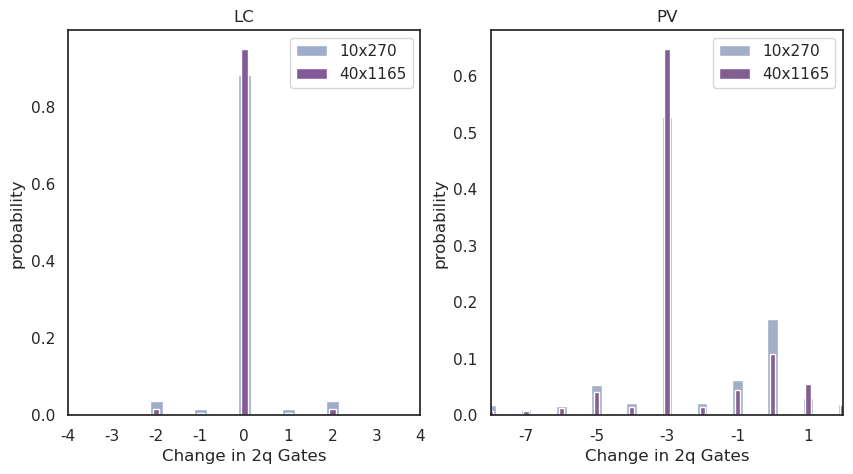

In [24]:
fig,ax = plt.subplots(1,2, figsize= (10,5))
ax[0].set_title("LC")
ax[0].set_xlabel('Change in 2q Gates')

ax[1].set_title("PV")
ax[1].set_xlabel('Change in 2q Gates')
ax[1].set_xlim(-15,15)

palette = sns.color_palette(palette='BuPu')
colors = [palette[2], palette[4]]
alphas = [1, 1, 0.2]
widths = [.3,.15]
sizes = action_pattern_table["Size"].unique()
for idx, size in enumerate(sizes):
    subset = action_pattern_table[(action_pattern_table["0"]=="LC") & (action_pattern_table["Size"]==size)]
    sns.countplot(subset, x="1", alpha=alphas[idx], fill=True, ax=ax[0], label=size, stat='probability', color=colors[idx], width=widths[idx])
ax[0].set_xlim(2,10)


sizes = action_pattern_table["Size"].unique()
for idx, size in enumerate(sizes):
    subset = action_pattern_table[(action_pattern_table["0"]=="PV") & (action_pattern_table["Size"]==size)]
    sns.countplot(subset, x="1", alpha=alphas[idx], fill=True, ax=ax[1], label=size, stat='probability', dodge=True, color=colors[idx],  
                  width=widths[idx], saturation = 0.6)

ax[1].set_xticks(ax[1].get_xticks()[::2])
ax[1].set_xlim(5,15)



In [25]:
action_pattern_table["Cumulative_reward"] = action_pattern_table.groupby(['Size', "Episode"])["1"].cumsum().reset_index()["1"]

/tmp/ipykernel_3367837/1959475.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_episode_reward = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()


<Axes: xlabel='reward_difference', ylabel='Count'>

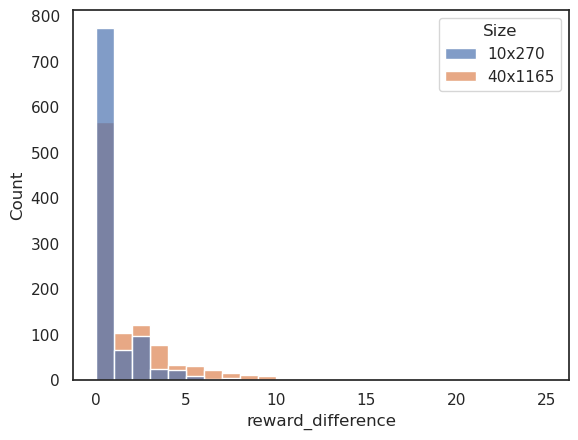

In [26]:
reward_difference = action_pattern_table.groupby(['Size', "Episode"])["Cumulative_reward"].min().reset_index()
final_episode_reward = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()
reward_difference_merged = pd.merge(reward_difference, final_episode_reward,  how='inner', left_on=['Size','Episode'], right_on = ['Size','Episode'])
reward_difference_merged["reward_difference"] = reward_difference_merged["Cumulative_reward_y"] - reward_difference_merged["Cumulative_reward_x"]
sns.histplot(reward_difference_merged, x="reward_difference", hue="Size", alpha=0.7, bins=25)


In [27]:
action_pattern_table[action_pattern_table["Size"]=="10x270"].head(20)

,0,1,Episode,Size,Cumulative_reward
0,PV,-3,0,10x270,-3
1,PVB,3,0,10x270,0
2,PVB,-2,0,10x270,-2
3,PV,-4,0,10x270,-6
4,PV,-5,0,10x270,-11
5,LC,2,0,10x270,-9
6,LC,0,0,10x270,-9
7,PV,0,0,10x270,-9
8,LC,0,0,10x270,-9
9,STOP,0,0,10x270,-9


In [28]:
prova = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()
prova[prova["Size"]=="10x270"]

/tmp/ipykernel_3367837/3567031384.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  prova = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()


,index,Size,Episode,Cumulative_reward
0,9,10x270,0,-9
1,17,10x270,1,-9
2,22,10x270,2,-3
3,33,10x270,3,-15
4,44,10x270,4,-5
...,...,...,...,...
995,11605,10x270,995,-3
996,11614,10x270,996,-1
997,11618,10x270,997,0
998,11634,10x270,998,-9


In [29]:
prova = action_pattern_table.groupby(['Size', "Episode"])["Cumulative_reward"].min().reset_index()
prova


,Size,Episode,Cumulative_reward
0,10x270,0,-11
1,10x270,1,-9
2,10x270,2,-3
3,10x270,3,-15
4,10x270,4,-9
...,...,...,...
1995,40x1165,995,-11
1996,40x1165,996,-6
1997,40x1165,997,-13
1998,40x1165,998,-13


In [30]:
reward_difference[reward_difference["Size"]=="10x270"]

,Size,Episode,Cumulative_reward
0,10x270,0,-11
1,10x270,1,-9
2,10x270,2,-3
3,10x270,3,-15
4,10x270,4,-9
...,...,...,...
995,10x270,995,-3
996,10x270,996,-4
997,10x270,997,0
998,10x270,998,-9


In [31]:
last_pivoting = action_pattern_table.groupby(['Size', "Episode"])["Cumulative_reward"].idxmin().reset_index()
episode_end = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()
last_piv_dif = pd.merge(last_pivoting, episode_end,  how='inner', left_on=['Size','Episode'], right_on = ['Size','Episode'])
last_piv_dif["action_difference"] = last_piv_dif["Cumulative_reward_x"] - last_piv_dif["index"]

useless_actions = pd.DataFrame()
useful_actions = pd.DataFrame()
for index, row in last_piv_dif.iterrows():
    idx_min = action_pattern_table[(action_pattern_table["Size"]==row["Size"]) & (action_pattern_table["Episode"]==row["Episode"])]["Cumulative_reward"].idxmin()
    candidate_df = action_pattern_table[(action_pattern_table["Size"]==row["Size"]) & (action_pattern_table["Episode"]==row["Episode"])].loc[idx_min:]
    useless_actions = pd.concat([useless_actions, candidate_df], ignore_index=True)




/tmp/ipykernel_3367837/3292545081.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  episode_end = action_pattern_table.groupby(['Size', "Episode"])['Size', "Episode","Cumulative_reward"].tail(1).reset_index()


<Axes: xlabel='0', ylabel='count'>

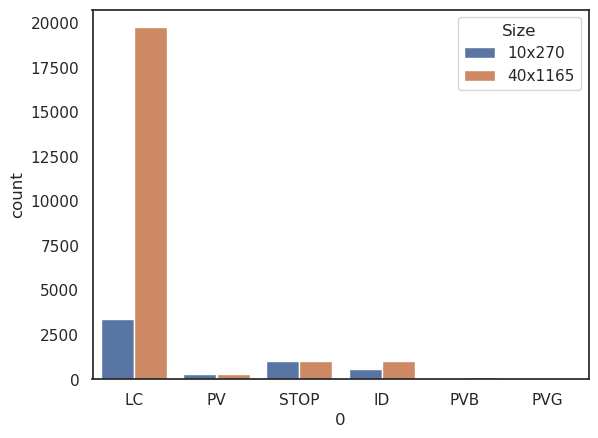

In [32]:
sns.countplot(useless_actions[useless_actions["1"]==0], x="0", hue="Size")

In [ ]:
import pyzx as zx
import numpy as np

def basic_optimise(c):
    c1 = zx.basic_optimization(c.copy(), do_swaps=False).to_basic_gates()
    c2 = zx.basic_optimization(c.copy(), do_swaps=True).to_basic_gates()
    if c2.twoqubitcount() < c1.twoqubitcount(): return c2 # As this optimisation algorithm is targetted at reducting H-gates, we use the circuit with the smaller 2-qubit gate count here, either using SWAP rules or not.
    return c1

def clifford_simp(c):
    g = c.to_graph()
    zx.clifford_simp(g, quiet=True)
    c2 = zx.extract_circuit(g).to_basic_gates()
    return basic_optimise(c2)

def teleport_reduce(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    #zx.full_reduce(g, quiet=True)
    c2 = zx.Circuit.from_graph(g)
    return basic_optimise(c2)

def full_reduce_opt(c):
    g = c.to_graph()
    zx.simplify.full_reduce(g)
    c2 = zx.extract_simple(g).to_basic_gates()
    return basic_optimise(c2)

def gflow_opt(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.simplify.greedy_simp(g)
    c2 = zx.extract_circuit(g).to_basic_gates()
    return basic_optimise(c2)

def flow_opt(c):
    g = c.to_graph()
    zx.teleport_reduce(g)
    zx.to_graph_like(g)
    zx.flow_2Q_simp(g)
    c2 = zx.extract_simple(g).to_basic_gates()
    return basic_optimise(c2)

In [ ]:
qubits,depth = 10,10

result_list, basic_result, full_list, cflow_list, gflow_list = [],[],[],[],[]
tqresult_list, tqbasic_result, tqfull_list, tqcflow_list, tqgflow_list = [],[],[],[],[]
initial_twoqubit = []
for _ in range(0,400, 10):
    list1,list2,list3,list4, list5 = [],[],[],[],[]
    twoq1,twoq2,twoq3,twoq4, twoq5 = [],[],[],[],[]
    initialtwoq = []
    for _ in range(40):
        
        g = zx.generate.cliffordT(qubits, depth, p_cnot=0.25,p_t=0.25, p_hsh=0.25, p_s=0.25 )
        c = zx.Circuit.from_graph(g.copy())
        cflow = flow_opt(c.copy())
       
        

        
        g_full = g.copy()
        zx.simplify.full_reduce(g_full)
        full_circuit = zx.extract_circuit(g_full.copy()).to_basic_gates()
        full_circuit_optimized = basic_optimise(full_circuit)

        circuit= zx.basic_optimization(c.split_phase_gates()).to_basic_gates()
        gflow = gflow_opt(c.copy())
        
        basic_dict = circuit.stats_dict()
        full_circuit_optimized_dict = full_circuit_optimized.stats_dict()
        cflow_circuit = cflow.stats_dict()
        gflow_circuit = gflow.stats_dict()
       
      
        list2.append(basic_dict["gates"])
        list3.append(full_circuit_optimized_dict["gates"])
        list4.append(cflow_circuit["gates"])
        list5.append(gflow_circuit["gates"])
     
        twoq2.append(basic_dict["twoqubit"])
        twoq3.append(full_circuit_optimized_dict["twoqubit"])
        twoq4.append(cflow_circuit["twoqubit"])
        twoq5.append(gflow_circuit["twoqubit"])
    
  
    basic_result.append(np.mean(list2))
    full_list.append(np.mean(list3))
    cflow_list.append(np.mean(list4))
    gflow_list.append(np.mean(list5))
    
    tqbasic_result.append(np.mean(twoq2))
    tqfull_list.append(np.mean(twoq3))
    tqcflow_list.append(np.mean(twoq4))
    initial_twoqubit.append(np.mean(initialtwoq))
    tqgflow_list.append(np.mean(twoq5))
    depth=depth+10

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rc("font", size=15)
plt.rcParams["grid.linewidth"] = 0.2
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"] = 0.5
plt.rcParams["font.family"] = "serif"
plt.grid(True, color="black")
styles = ["-", "--", "-.", ":", "dashed"]
colors = ["#53257F", "#BC1B73", "#F8534A", "#FFA600"]
depth = np.arange(40) * 8 + 10
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(
    depth, basic_result, c="#0343DF", marker="s", markersize=3.5, linestyle="solid", linewidth=0.8, label="basic-opt"
)
ax1.plot(depth,full_list, c="#7E1E9C", marker="v", markersize=3.5, linestyle="--", linewidth=0.8, label="full-reduce+")
ax1.plot(depth, cflow_list, c="#F97306", marker="o", markersize=2.5, linestyle="--", linewidth=0.8, label="cflow-zx")
ax1.plot(depth, gflow_list, marker="x", markersize=2.5, linestyle="--", linewidth=0.8, label="gflow-zx")


ax1.fill_between(depth, depth, np.max(depth), where=(depth <= depth), color="red", alpha=0.1, interpolate=True)
ax1.fill_between(depth, depth, np.min(depth), where=(depth <= depth), color="green", alpha=0.1, interpolate=True)
ax1.set_xlabel("Initial gates")
ax1.set_xlim(10, 320)
ax1.set_ylim(10, 320)
ax1.set_title("(a)")
ax1.set_ylabel("Gates after optimization")
ax2.plot(
    depth * 0.25, tqcflow_list, c="#F97306", marker="o", markersize=2.5, linestyle="--", linewidth=0.8, label="rl-zx"
)
ax2.plot(
    depth * 0.25,
    tqfull_list,
    c="#7E1E9C",
    marker="v",
    markersize=3.5,
    linestyle="--",
    linewidth=0.8,
    label="full-reduce",
)
ax2.plot(
    depth * 0.25,
    tqbasic_result,
    c="#0343DF",
    marker="s",
    markersize=3.5,
    linestyle="solid",
    linewidth=0.8,
    label="basic-opt",
)
ax2.plot(
    depth * 0.25,
    tqgflow_list,
    marker="s",
    markersize=3.5,
    linestyle="solid",
    linewidth=0.8,
    label="gflow-zx",
)
ax2.fill_between(
    0.25 * depth,
    0.25 * depth,
    np.max(depth),
    where=(0.25 * depth <= 0.25 * depth),
    color="red",
    alpha=0.1,
    interpolate=True,
)
ax2.fill_between(
    0.25 * depth,
    0.25 * depth,
    np.min(0.25 * depth),
    where=(0.25 * depth <= 0.25 * depth),
    color="green",
    alpha=0.1,
    interpolate=True,
)

ax2.set_xlabel("Initial 2-qubit gates")
ax2.set_xlim(3,80)
ax2.set_ylim(3, 220)
ax2.set_title("(b)")
ax2.set_ylabel("2-qubit Gates after optimization")
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), edgecolor="black", ncol=4)
# fig.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=4, edgecolor="black")
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig(os.path.join(path,"10-qubitsresults.pdf"), format="pdf", dpi=1200, bbox_inches="tight")